# Case Study : Multivariate Time Series

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.api import VAR

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (16, 4)

<Axes: xlabel='DATE'>

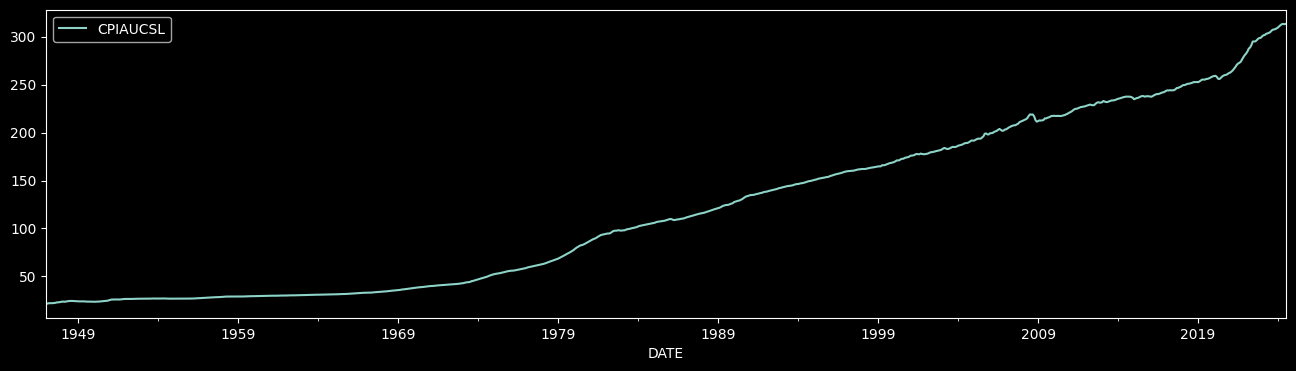

In [17]:
cpi = pd.read_csv(r'C:\Users\wassim\Documents\Projects\Vector autoregression\data\CPIAUCSL.csv',parse_dates=['DATE'],
                  index_col='DATE')

cpi.plot()

<Axes: xlabel='DATE'>

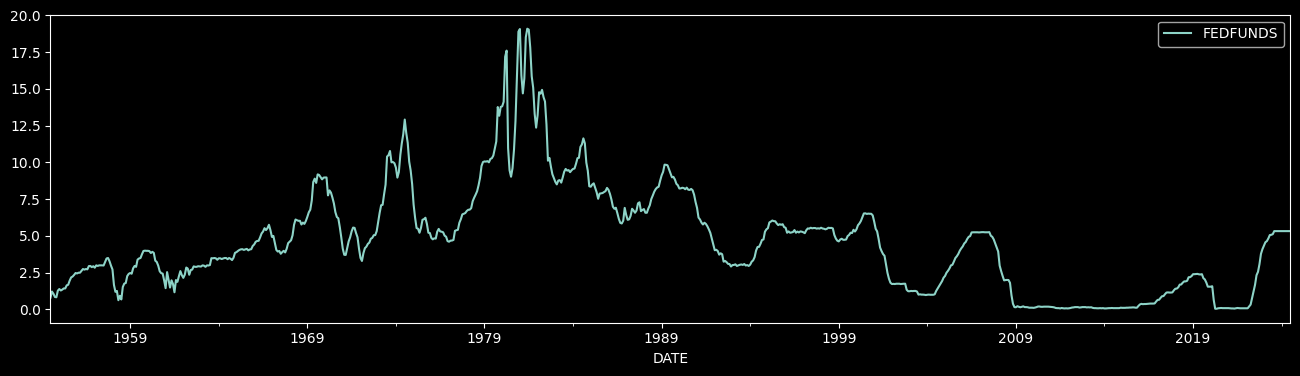

In [19]:
fed_funds = pd.read_csv(r'C:\Users\wassim\Documents\Projects\Vector autoregression\data\FEDFUNDS.csv',parse_dates=['DATE'],
                        index_col='DATE')

fed_funds.plot()

<Axes: xlabel='DATE'>

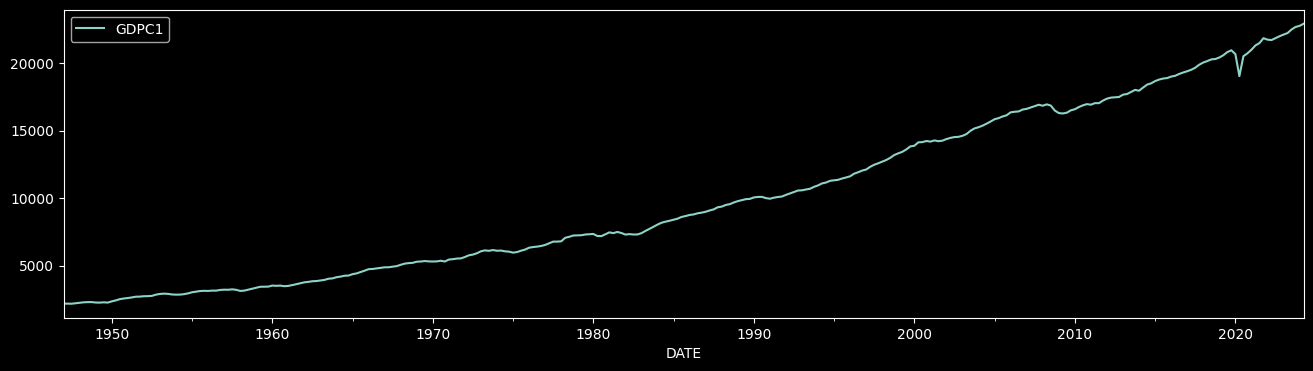

In [39]:
gdp = pd.read_csv(r'C:\Users\wassim\Documents\Projects\Vector autoregression\data\GDPC1.csv',parse_dates=['observation_date'],
                  index_col='observation_date')

gdp.index.name = 'DATE'

gdp.plot()

<Axes: xlabel='DATE'>

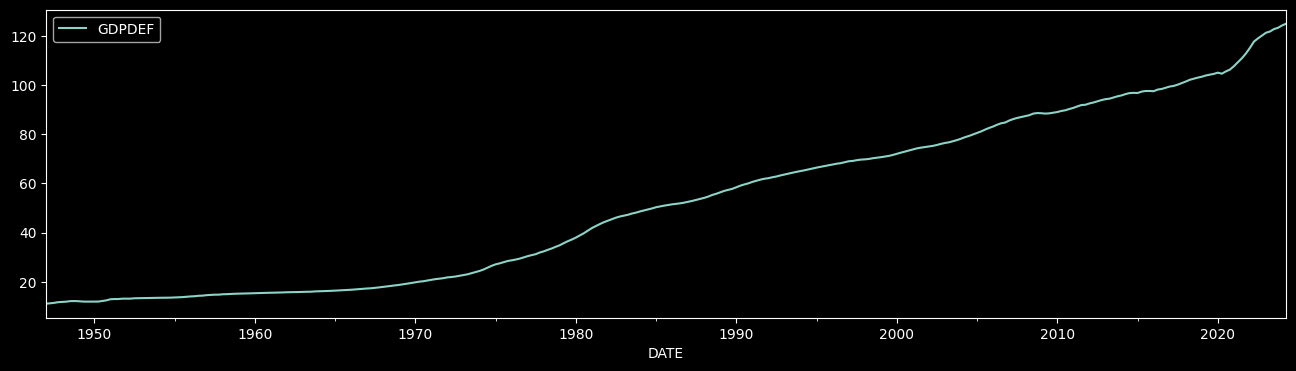

In [41]:
gdpdef = pd.read_csv(r'C:\Users\wassim\Documents\Projects\Vector autoregression\data\GDPDEF.csv',parse_dates=['DATE'],
                     index_col='DATE')

gdpdef.plot()

<Axes: xlabel='DATE'>

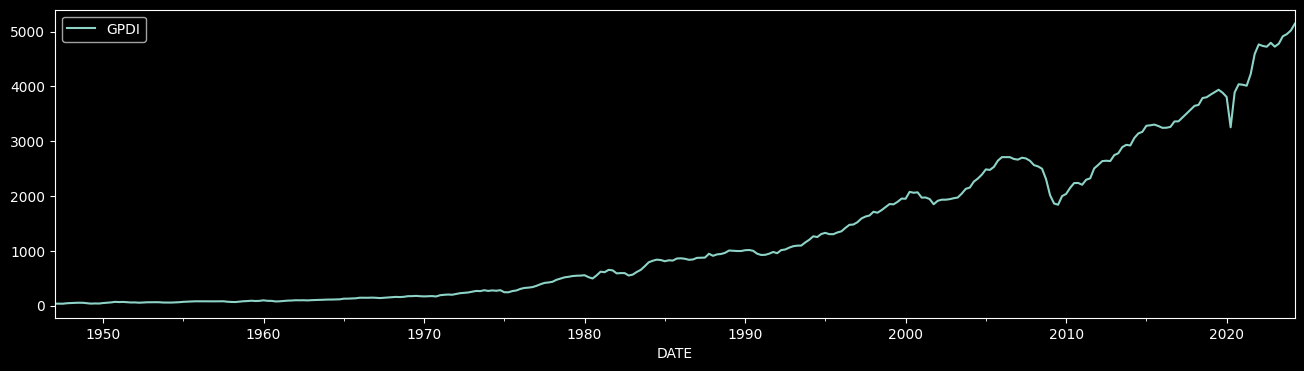

In [43]:
gdpi = pd.read_csv(r'C:\Users\wassim\Documents\Projects\Vector autoregression\data\GPDI.csv',parse_dates=['DATE'],
                   index_col='DATE')

gdpi.plot()

In [46]:
m1

,observation_date,M1SL
0,1959-01-01,138.9
1,1959-02-01,139.4
2,1959-03-01,139.7
3,1959-04-01,139.7
4,1959-05-01,140.7
...,...,...
781,2024-02-01,17930.2
782,2024-03-01,17990.1
783,2024-04-01,17978.9
784,2024-05-01,18022.8


<Axes: xlabel='DATE'>

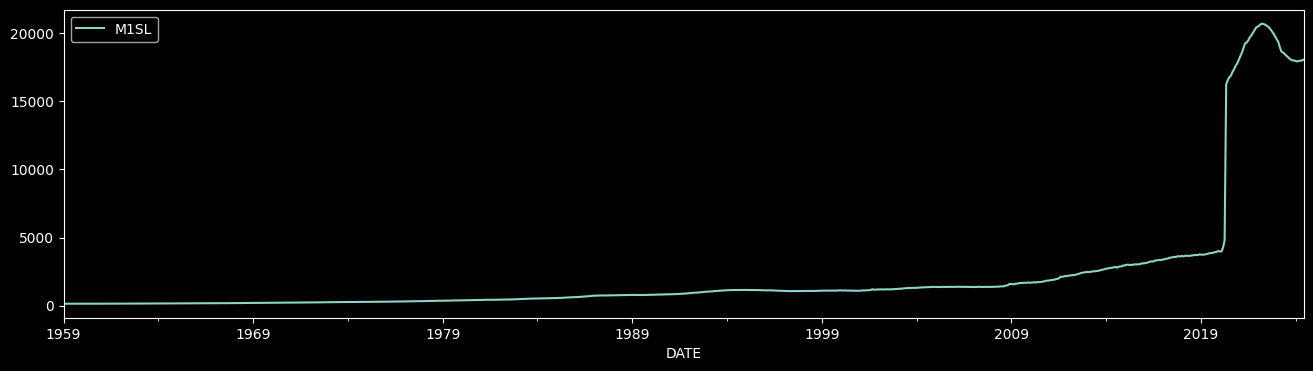

In [49]:
m1 = pd.read_csv(r'C:\Users\wassim\Documents\Projects\Vector autoregression\data\M1SL.csv',parse_dates=['observation_date'],
                 index_col='observation_date')

m1.rename_axis('DATE',inplace=True)

m1.plot()

[*********************100%%**********************]  1 of 1 completed


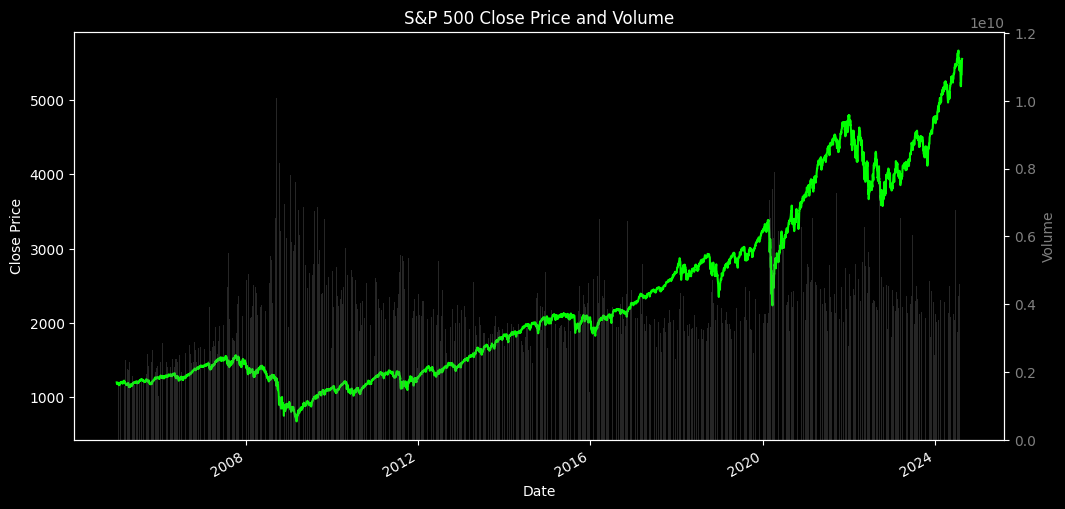

In [77]:
sp500 = yf.download('^GSPC',start='2005-01-01')

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the price data as a line plot on the primary y-axis
ax1.plot(sp500.index, sp500['Close'], color='lime', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price',)
ax1.tick_params(axis='y',)

# Create a secondary y-axis for the volume data
ax2 = ax1.twinx()
ax2.bar(sp500.index, sp500['Volume'], color='grey', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# Set title and format x-axis labels
plt.title('S&P 500 Close Price and Volume')
fig.autofmt_xdate()  # Rotate date labels for better readability

# Show plot
plt.show()

<Axes: xlabel='DATE'>

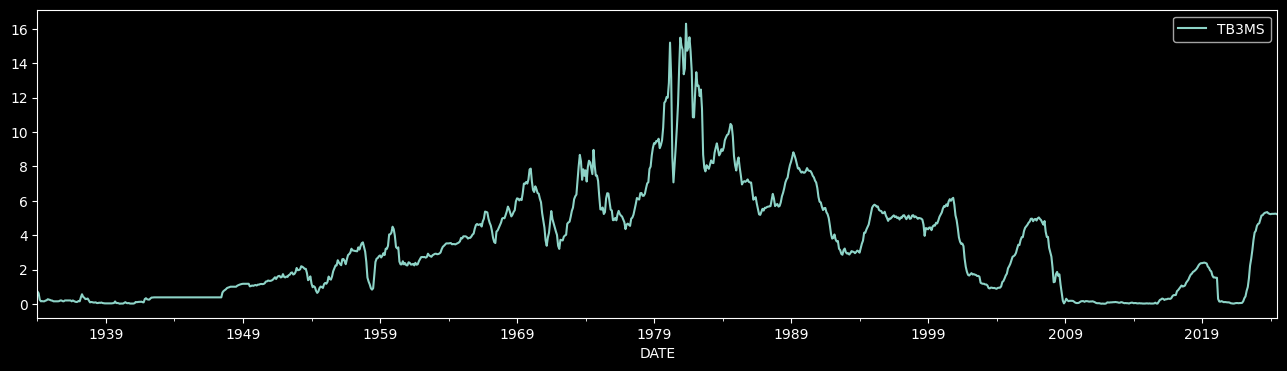

In [53]:
tb3ms = pd.read_csv(r'C:\Users\wassim\Documents\Projects\Vector autoregression\data\TB3MS.csv',parse_dates=['DATE'],
                   index_col='DATE')

tb3ms.plot()

<Axes: xlabel='DATE'>

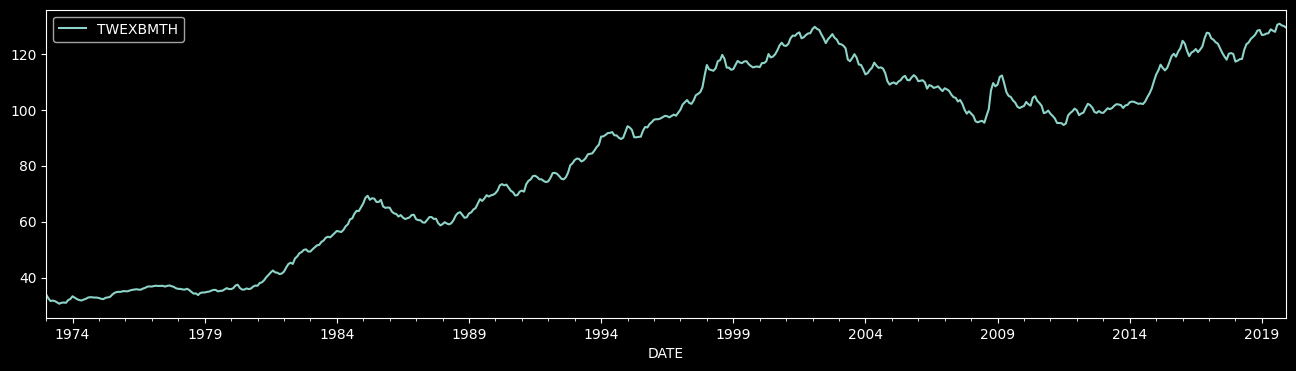

In [54]:
TWEXBMTH = pd.read_csv(r'C:\Users\wassim\Documents\Projects\Vector autoregression\data\TWEXBMTH.csv',parse_dates=['DATE'],
                   index_col='DATE')

TWEXBMTH.plot()

<Axes: xlabel='DATE'>

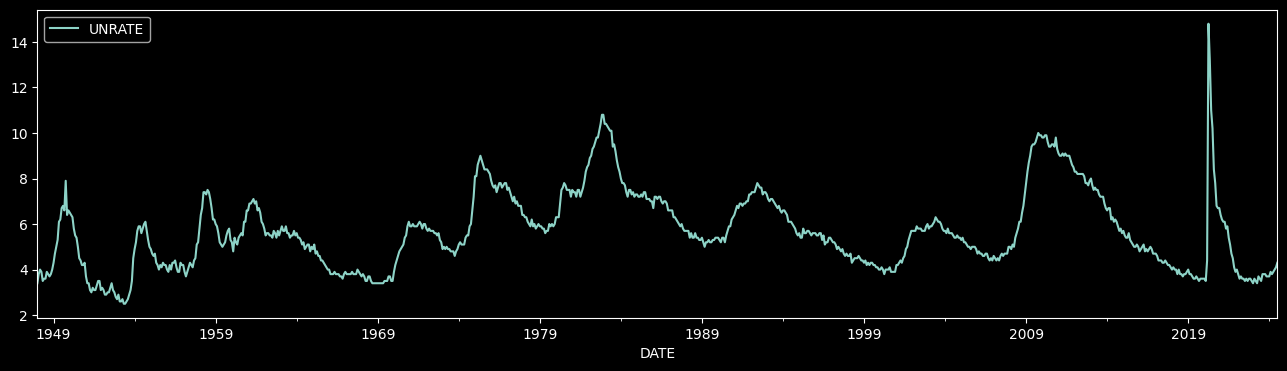

In [60]:
unrate = pd.read_csv(r'C:\Users\wassim\Documents\Projects\Vector autoregression\data\UNRATE.csv',parse_dates=['DATE'],
                   index_col='DATE')

unrate.plot()

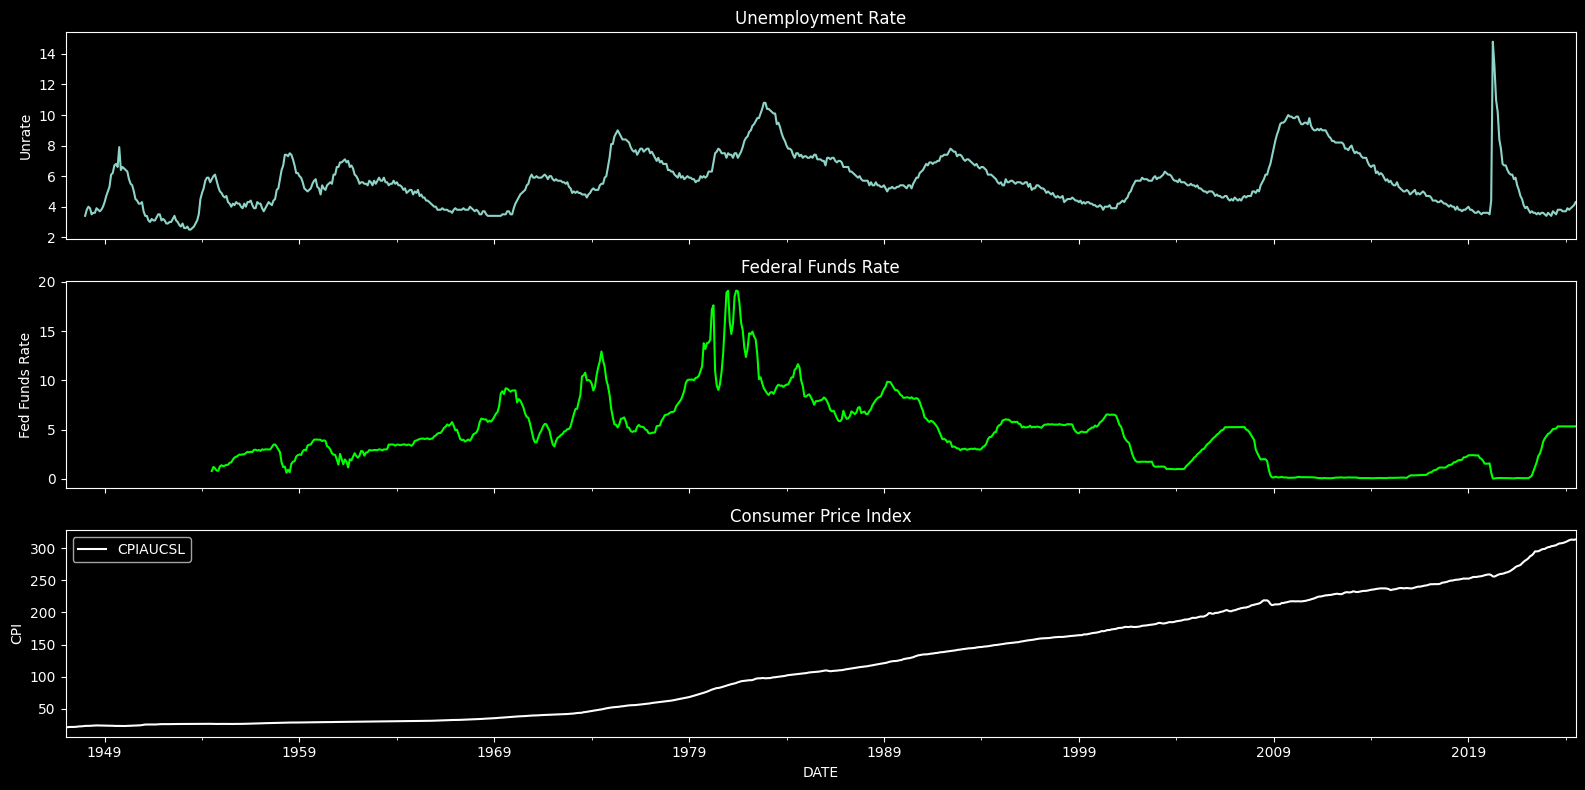

In [107]:
# Ordinary and Partial Autocorrelations of Reduced Set

merged = pd.merge(unrate,fed_funds,right_index=True,left_index=True,how='outer')
ymat0 = pd.merge(merged,cpi,right_index=True,left_index=True,how='outer')

fig, axes = plt.subplots(3,1,sharex=True,figsize=(16,8))

ymat0['UNRATE'].plot(ax=axes[0])
axes[0].set_title('Unemployment Rate')
axes[0].set_ylabel('Unrate')

ymat0['FEDFUNDS'].plot(ax=axes[1],color='lime')
axes[1].set_title('Federal Funds Rate')
axes[1].set_ylabel('Fed Funds Rate')

ymat0['CPIAUCSL'].plot(ax=axes[2],color='white')
axes[2].set_title('Consumer Price Index')
axes[2].set_ylabel('CPI')

plt.xlabel('DATE')
plt.legend()
plt.tight_layout()

In [111]:
# Extract window from 1960 to 2000

ymat00 = ymat0.loc['1960-01-01':'2000-12-31',:]

ymat00.shape

(492, 3)

In [146]:
from statsmodels.tsa.stattools import ccf,acf,pacf

In [148]:
help(ccf)

Help on function ccf in module statsmodels.tsa.stattools:

ccf(x, y, adjusted=True, fft=True, *, nlags=None, alpha=None)
    The cross-correlation function.

    Parameters
    ----------
    x, y : array_like
        The time series data to use in the calculation.
    adjusted : bool
        If True, then denominators for cross-correlation are n-k, otherwise n.
    fft : bool, default True
        If True, use FFT convolution.  This method should be preferred
        for long time series.
    nlags : int, optional
        Number of lags to return cross-correlations for. If not provided,
        the number of lags equals len(x).
    alpha : float, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidence intervals are
        returned where the standard deviation is computed according to
        1/sqrt(len(x)).

    Returns
    -------
    ndarray
        The cross-correlation function of x and y

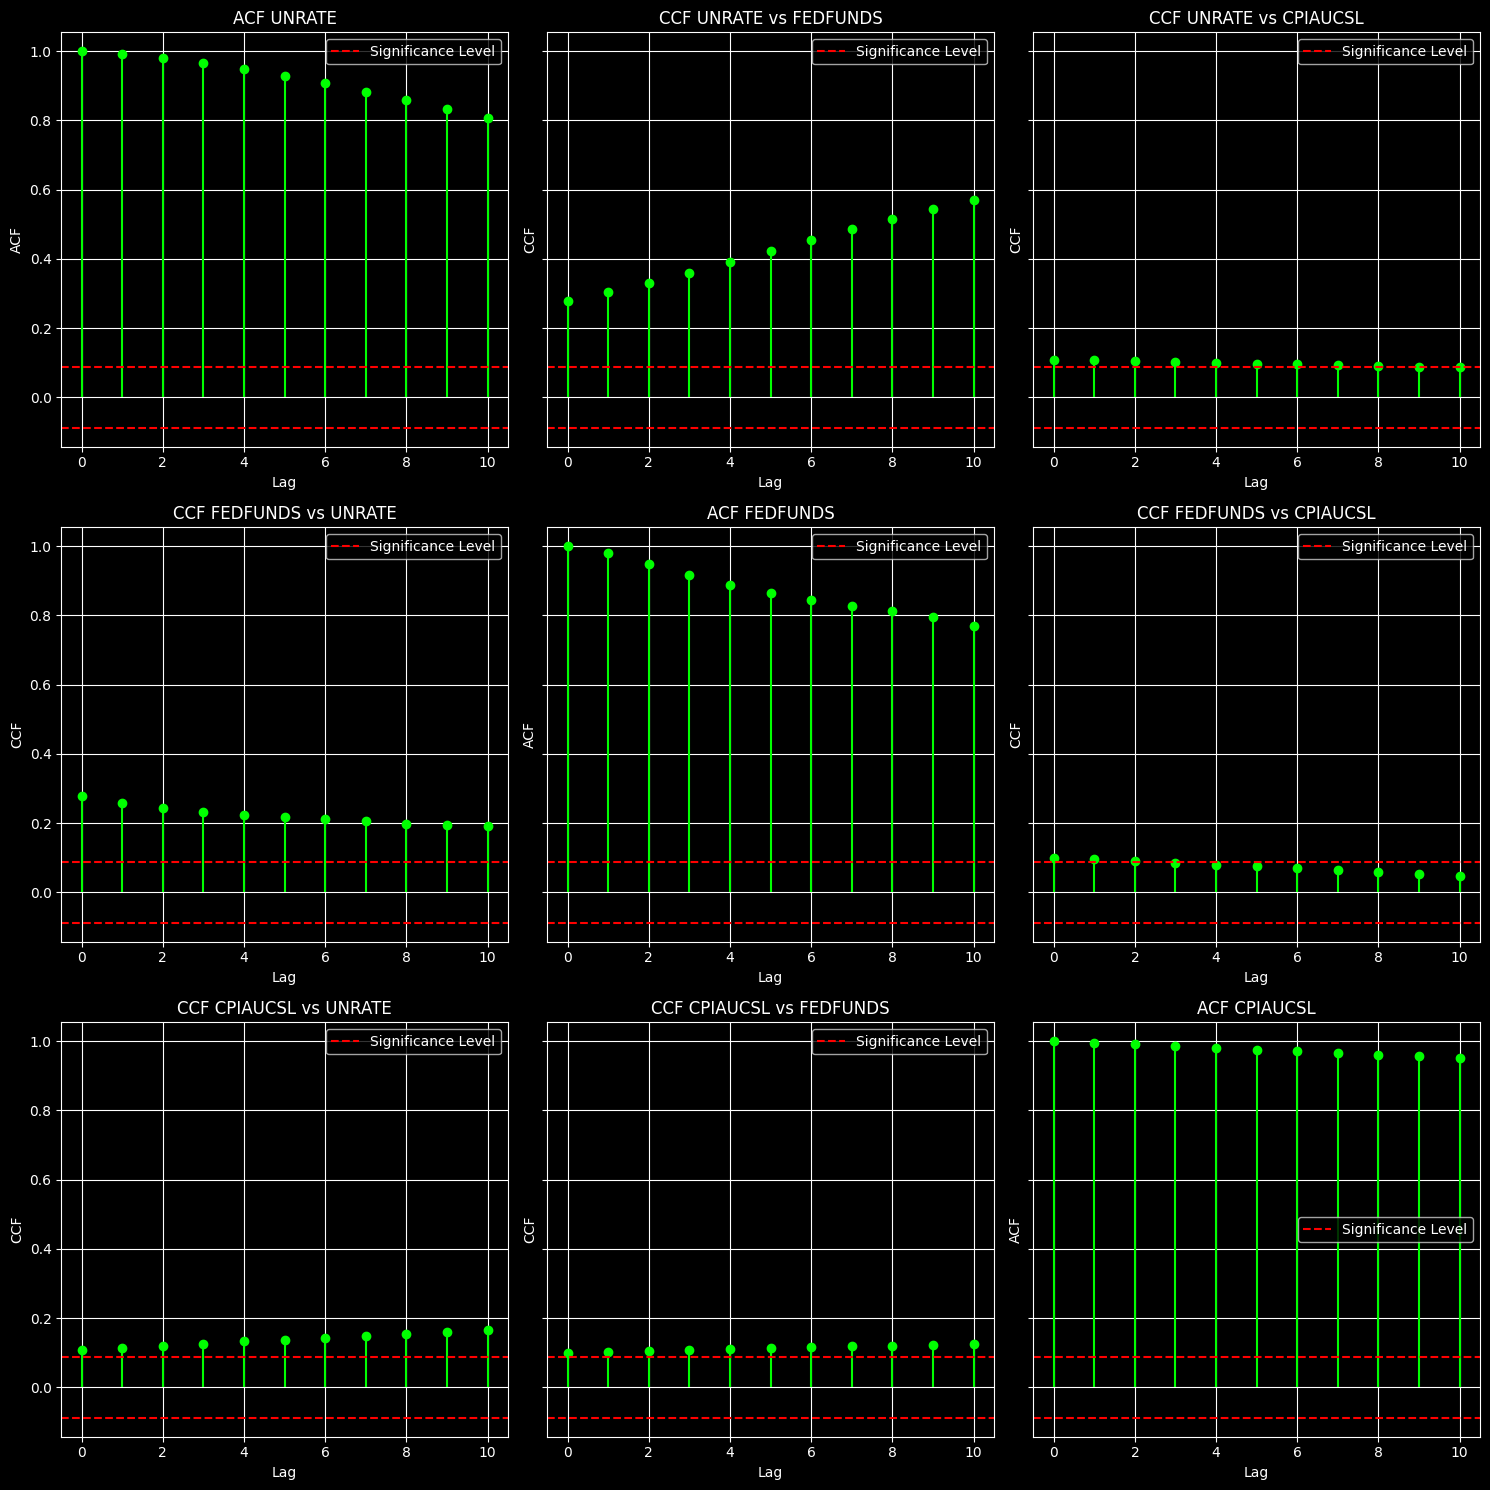

In [201]:
def plot_acf_ccf(data, lags=10, confidence_interval=1.96):
    """
    Plots ACF and CCF for each pair of columns in the provided DataFrame.

    Parameters:
    - data: pd.DataFrame containing the time series data.
    - lags: Number of lags to consider for ACF and CCF.
    - confidence_interval: The confidence interval for significance level lines.
    """
    
    num_vars = len(data.columns)
    fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(15, 15), sharey=True)

    for i, col1 in enumerate(data.columns):
        for j, col2 in enumerate(data.columns):
            ax = axes[i, j]
            if i != j:
                
                ccf_values = ccf(data[col1], data[col2], adjusted=False)[:lags+1]

                ax.stem(range(lags+1), ccf_values, linefmt='lime', markerfmt='o', basefmt=' ')
                ax.set_title(f'CCF {col1} vs {col2}')
                ax.set_xlabel('Lag')
                ax.set_ylabel('CCF')
                ax.grid(True)

                threshold = confidence_interval / (len(data[col1])**0.5)
                ax.axhline(y=threshold, color='red', linestyle='--', label='Significance Level')
                ax.axhline(y=-threshold, color='red', linestyle='--')
                ax.legend()
            else:
                
                acf_values = acf(data[col1], nlags=lags)

                ax.stem(range(lags+1), acf_values[:lags+1], linefmt='lime', markerfmt='o', basefmt=' ')
                ax.set_title(f'ACF {col1}')
                ax.set_xlabel('Lag')
                ax.set_ylabel('ACF')
                ax.grid(True)

                threshold = confidence_interval / (len(data[col1])**0.5)
                ax.axhline(y=threshold, color='red', linestyle='--', label='Significance Level')
                ax.axhline(y=-threshold, color='red', linestyle='--')
                ax.legend()

    
    plt.tight_layout()
    plt.show()

plot_acf_ccf(ymat00, lags=10, confidence_interval=1.96)

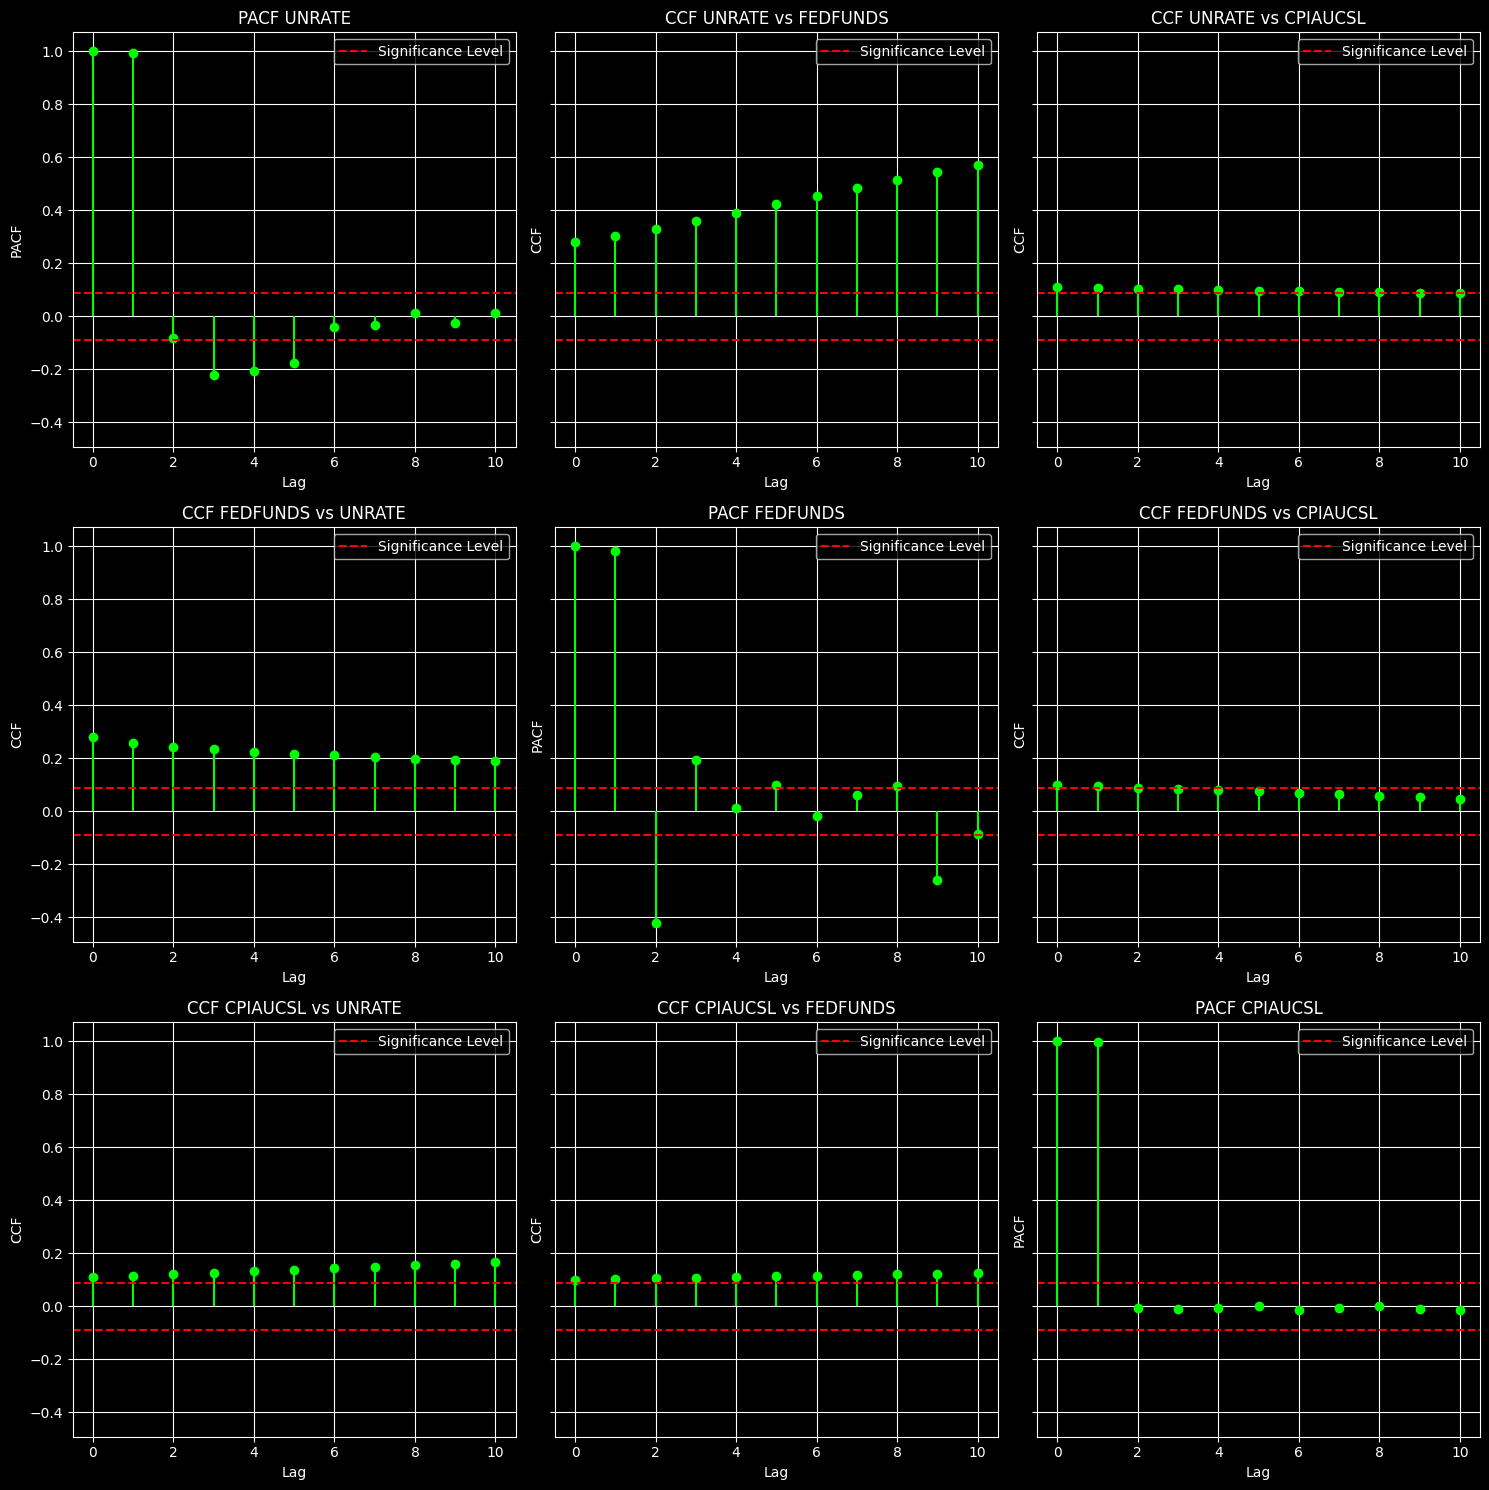

In [204]:
def plot_pacf_ccf(data, lags=10, confidence_interval=1.96):
    """
    Plots PACF and CCF for each pair of columns in the provided DataFrame.

    Parameters:
    - data: pd.DataFrame containing the time series data.
    - lags: Number of lags to consider for PACF and CCF.
    - confidence_interval: The confidence interval for significance level lines.
    """
    
    
    num_vars = len(data.columns)
    fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(15, 15), sharey=True)

    for i, col1 in enumerate(data.columns):
        for j, col2 in enumerate(data.columns):
            ax = axes[i, j]
            if i == j:
                
                pacf_values = pacf(data[col1], nlags=lags)

                ax.stem(range(lags+1), pacf_values[:lags+1], linefmt='lime', markerfmt='o', basefmt=' ')
                ax.set_title(f'PACF {col1}')
                ax.set_xlabel('Lag')
                ax.set_ylabel('PACF')
                ax.grid(True)

                threshold = confidence_interval / (len(data[col1])**0.5)
                ax.axhline(y=threshold, color='red', linestyle='--', label='Significance Level')
                ax.axhline(y=-threshold, color='red', linestyle='--')
                ax.legend()
            else:
                
                ccf_values = ccf(data[col1], data[col2], adjusted=False)[:lags+1]

                ax.stem(range(lags+1), ccf_values, linefmt='lime', markerfmt='o', basefmt=' ')
                ax.set_title(f'CCF {col1} vs {col2}')
                ax.set_xlabel('Lag')
                ax.set_ylabel('CCF')
                ax.grid(True)

                threshold = confidence_interval / (len(data[col1])**0.5)
                ax.axhline(y=threshold, color='red', linestyle='--', label='Significance Level')
                ax.axhline(y=-threshold, color='red', linestyle='--')
                ax.legend()

    
    plt.tight_layout()
    plt.show()
    
plot_pacf_ccf(ymat00, lags=10, confidence_interval=1.96)

In [159]:
# Vector Autoregressive (VAR) Model for Reduced Set

model = VAR(ymat00)

lag_order = model.select_order(maxlags=12)

print(lag_order.summary())
print('Best orders :',lag_order.selected_orders)

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        10.85       10.87   5.130e+04       10.86
1       -7.763      -7.659   0.0004252      -7.722
2       -8.090     -7.908*   0.0003065      -8.018
3       -8.162      -7.901   0.0002854      -8.059
4       -8.234      -7.895   0.0002655      -8.101
5       -8.265      -7.848   0.0002573     -8.101*
6       -8.260      -7.764   0.0002587      -8.065
7       -8.266      -7.693   0.0002570      -8.041
8       -8.309      -7.657   0.0002464      -8.052
9       -8.317      -7.586   0.0002445      -8.030
10      -8.334      -7.525   0.0002403      -8.016
11      -8.323      -7.436   0.0002432      -7.974
12     -8.345*      -7.380  0.0002378*      -7.966
--------------------------------------------------
Best orders : {'aic': 12, 'bic': 2, 'hqic': 5, 'fpe': 12}


In [169]:
#Fit the VAR model based on Bayes Information criterion (BIC)

var_model = model.fit(2)

print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 18, Aug, 2024
Time:                     22:50:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.87807
Nobs:                     490.000    HQIC:                  -7.98724
Log likelihood:          -90.6701    FPE:                0.000316613
AIC:                     -8.05783    Det(Omega_mle):     0.000303423
--------------------------------------------------------------------
Results for equation UNRATE
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.023873         0.035582            0.671           0.502
L1.UNRATE           0.972402         0.045932           21.170           0.000
L1.FEDFUNDS        -0.029274         0.013634           -2.147     

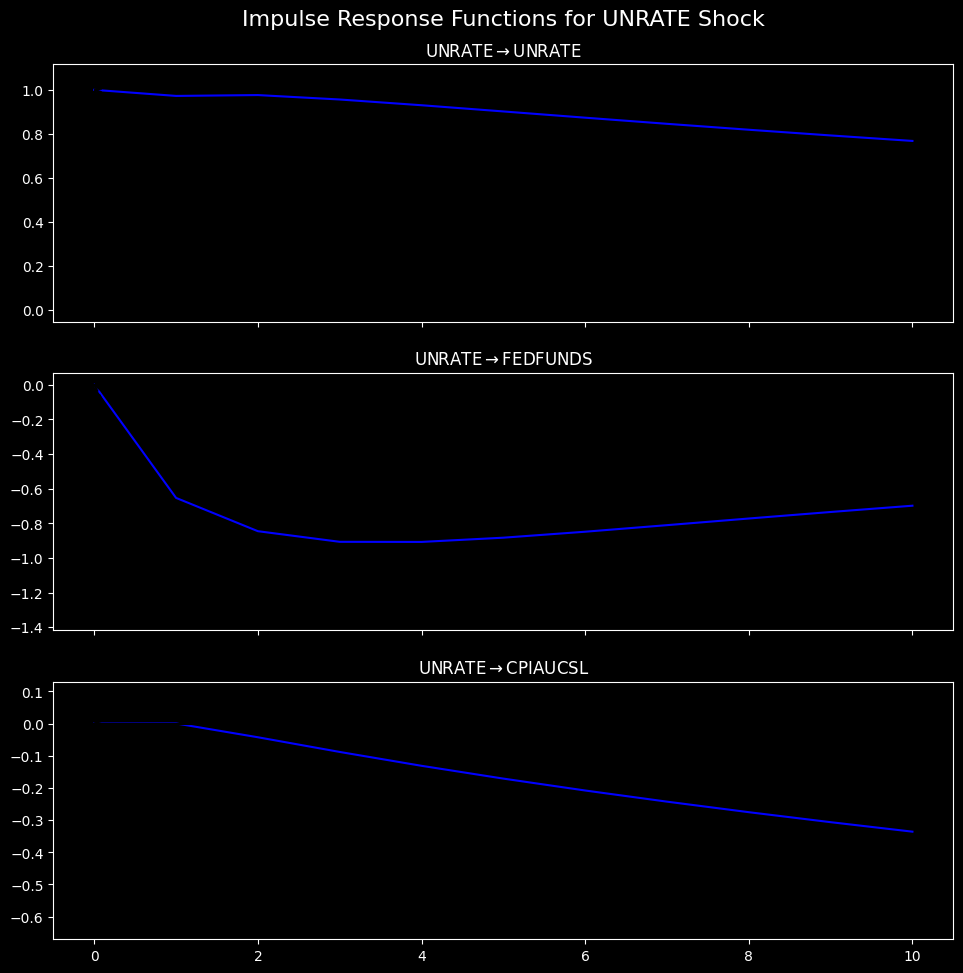

In [211]:
# Impulse Responde Function for a Fitted VAR(p) Model

irf = var_model.irf(10)

fig = irf.plot(impulse='UNRATE')
fig.suptitle('Impulse Response Functions for UNRATE Shock', fontsize=16)

plt.show()

- When unemployment rises:
   - the Federal Funds rate is projected to decline (consistent with Federal Reserve Policy) 
   - the CPI decreases (lower employment results in lesspressure to increase consumer prices)

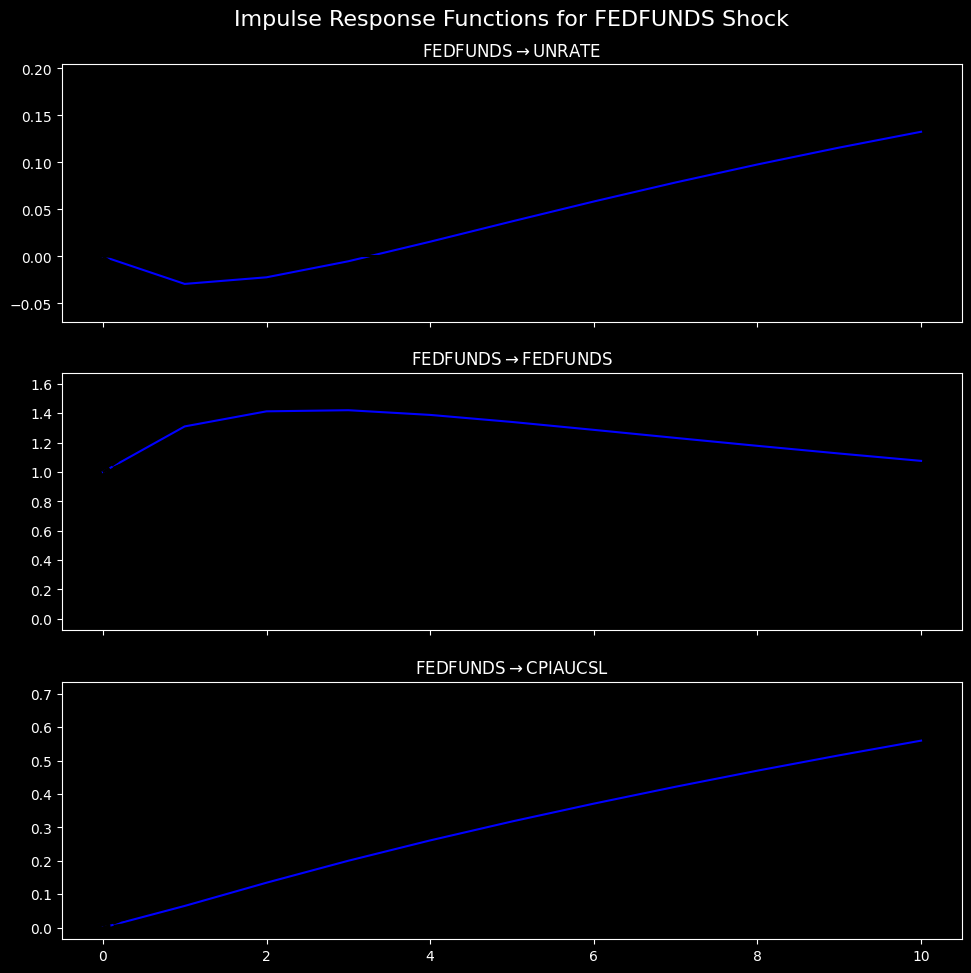

In [190]:
irf = var_model.irf(10)

fig = irf.plot(impulse='FEDFUNDS')
fig.suptitle('Impulse Response Functions for FEDFUNDS Shock', fontsize=16)

plt.show()

- When the Fed Funds rate increases:

  - The Unemployment rate tends to increase; so reducing the Fed Funds rate would tend to reduce unemployment 
  - The CPI increases; increases in the Fed Funds rate are associated with increase in CPI over future quarters

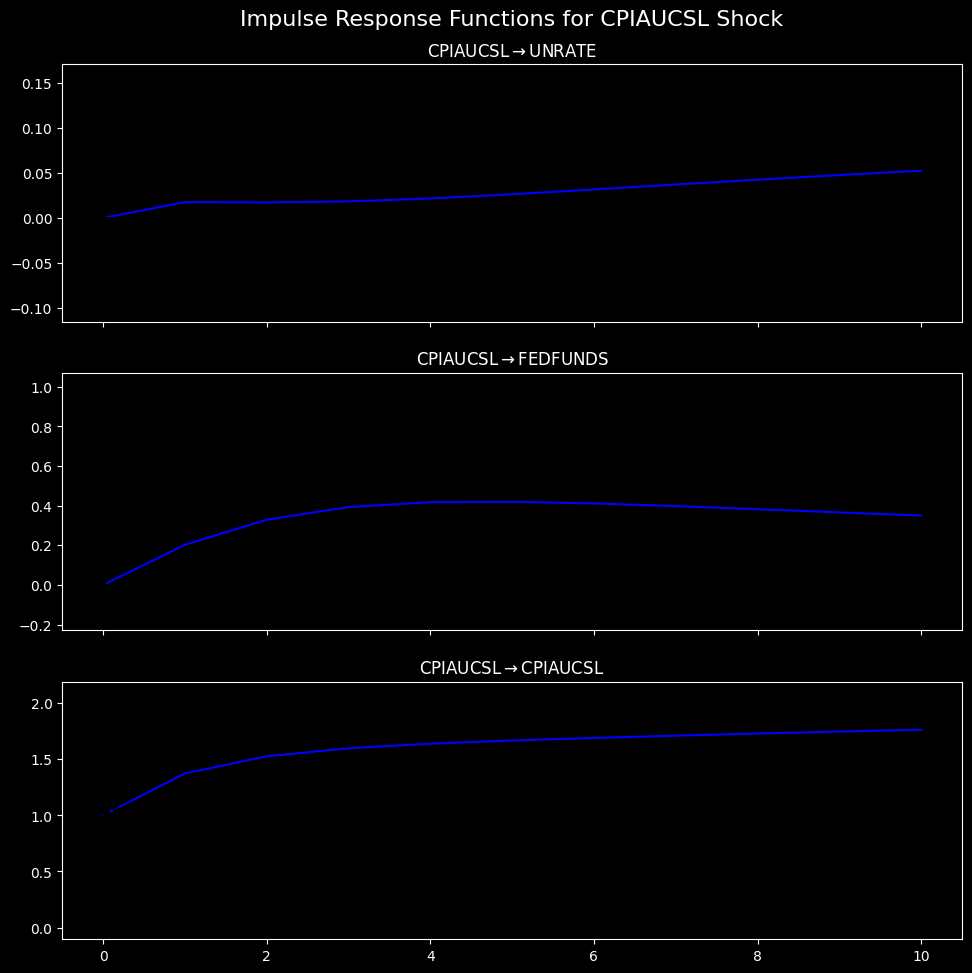

In [194]:
irf = var_model.irf(10)

fig = irf.plot(impulse='CPIAUCSL')
fig.suptitle('Impulse Response Functions for CPIAUCSL Shock', fontsize=16)

plt.show()

- When the CPI increases:

  - The Federal Funds rate tends to increase over subsequent quarters.
  - This is consistent with Federal Reserve policy of raising interest rates to control for inflation.

In [198]:
# Ordinary and Partial Autocorrelations of Differenced Series

diff_ymat00 = ymat00.diff().dropna()

diff_ymat00

,UNRATE,FEDFUNDS,CPIAUCSL
DATE,,,
1960-02-01,-0.4,-0.02,0.04
1960-03-01,0.6,-0.13,0.00
1960-04-01,-0.2,0.08,0.13
1960-05-01,-0.1,-0.07,0.03
1960-06-01,0.3,-0.53,0.04
...,...,...,...
2000-08-01,0.1,-0.04,0.00
2000-09-01,-0.2,0.02,0.90
2000-10-01,0.0,-0.01,0.30


In [202]:
help(plot_acf_ccf)

Help on function plot_acf_ccf in module __main__:

plot_acf_ccf(data, lags=10, confidence_interval=1.96)
    Plots ACF and CCF for each pair of columns in the provided DataFrame.

    Parameters:
    - data: pd.DataFrame containing the time series data.
    - lags: Number of lags to consider for ACF and CCF.
    - confidence_interval: The confidence interval for significance level lines.



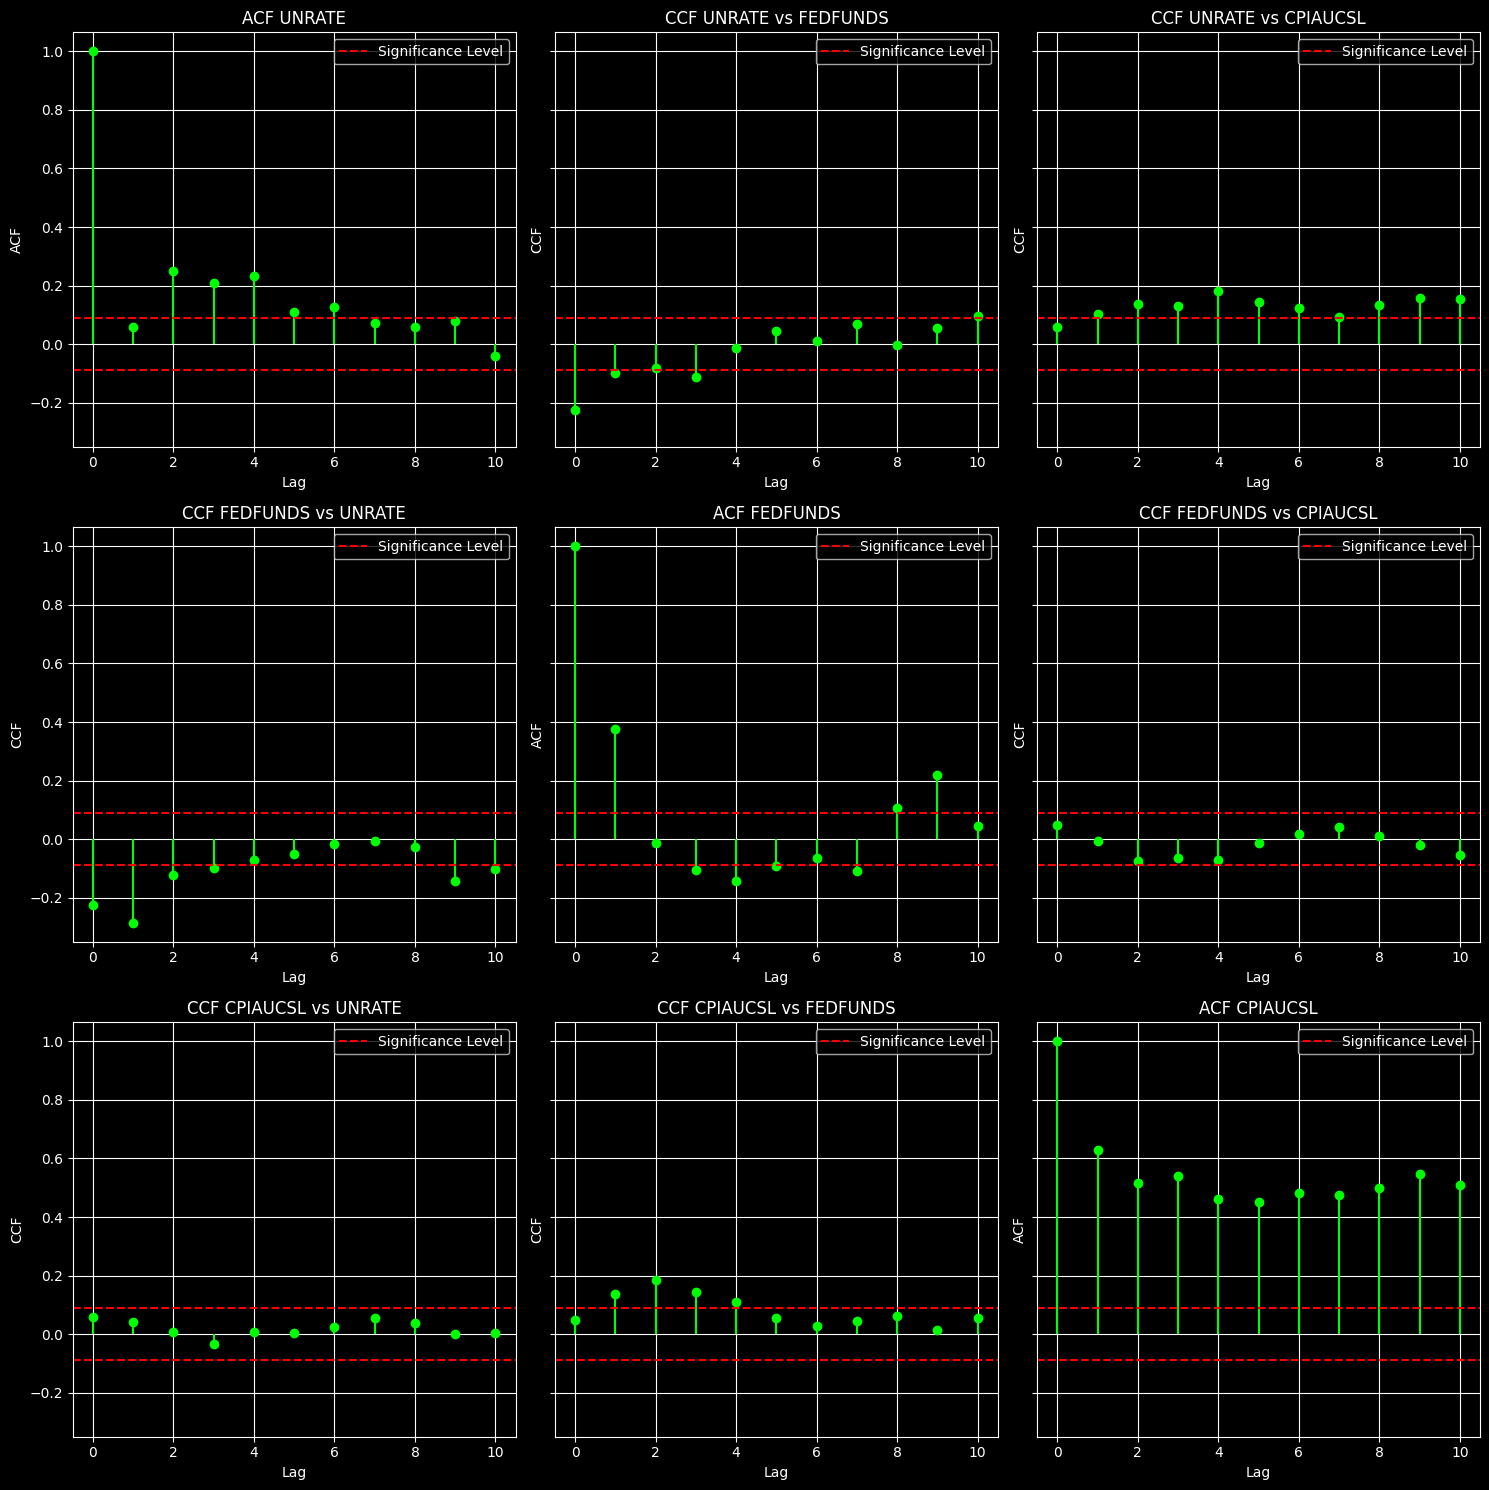

In [203]:
plot_acf_ccf(diff_ymat00,10,1.96)

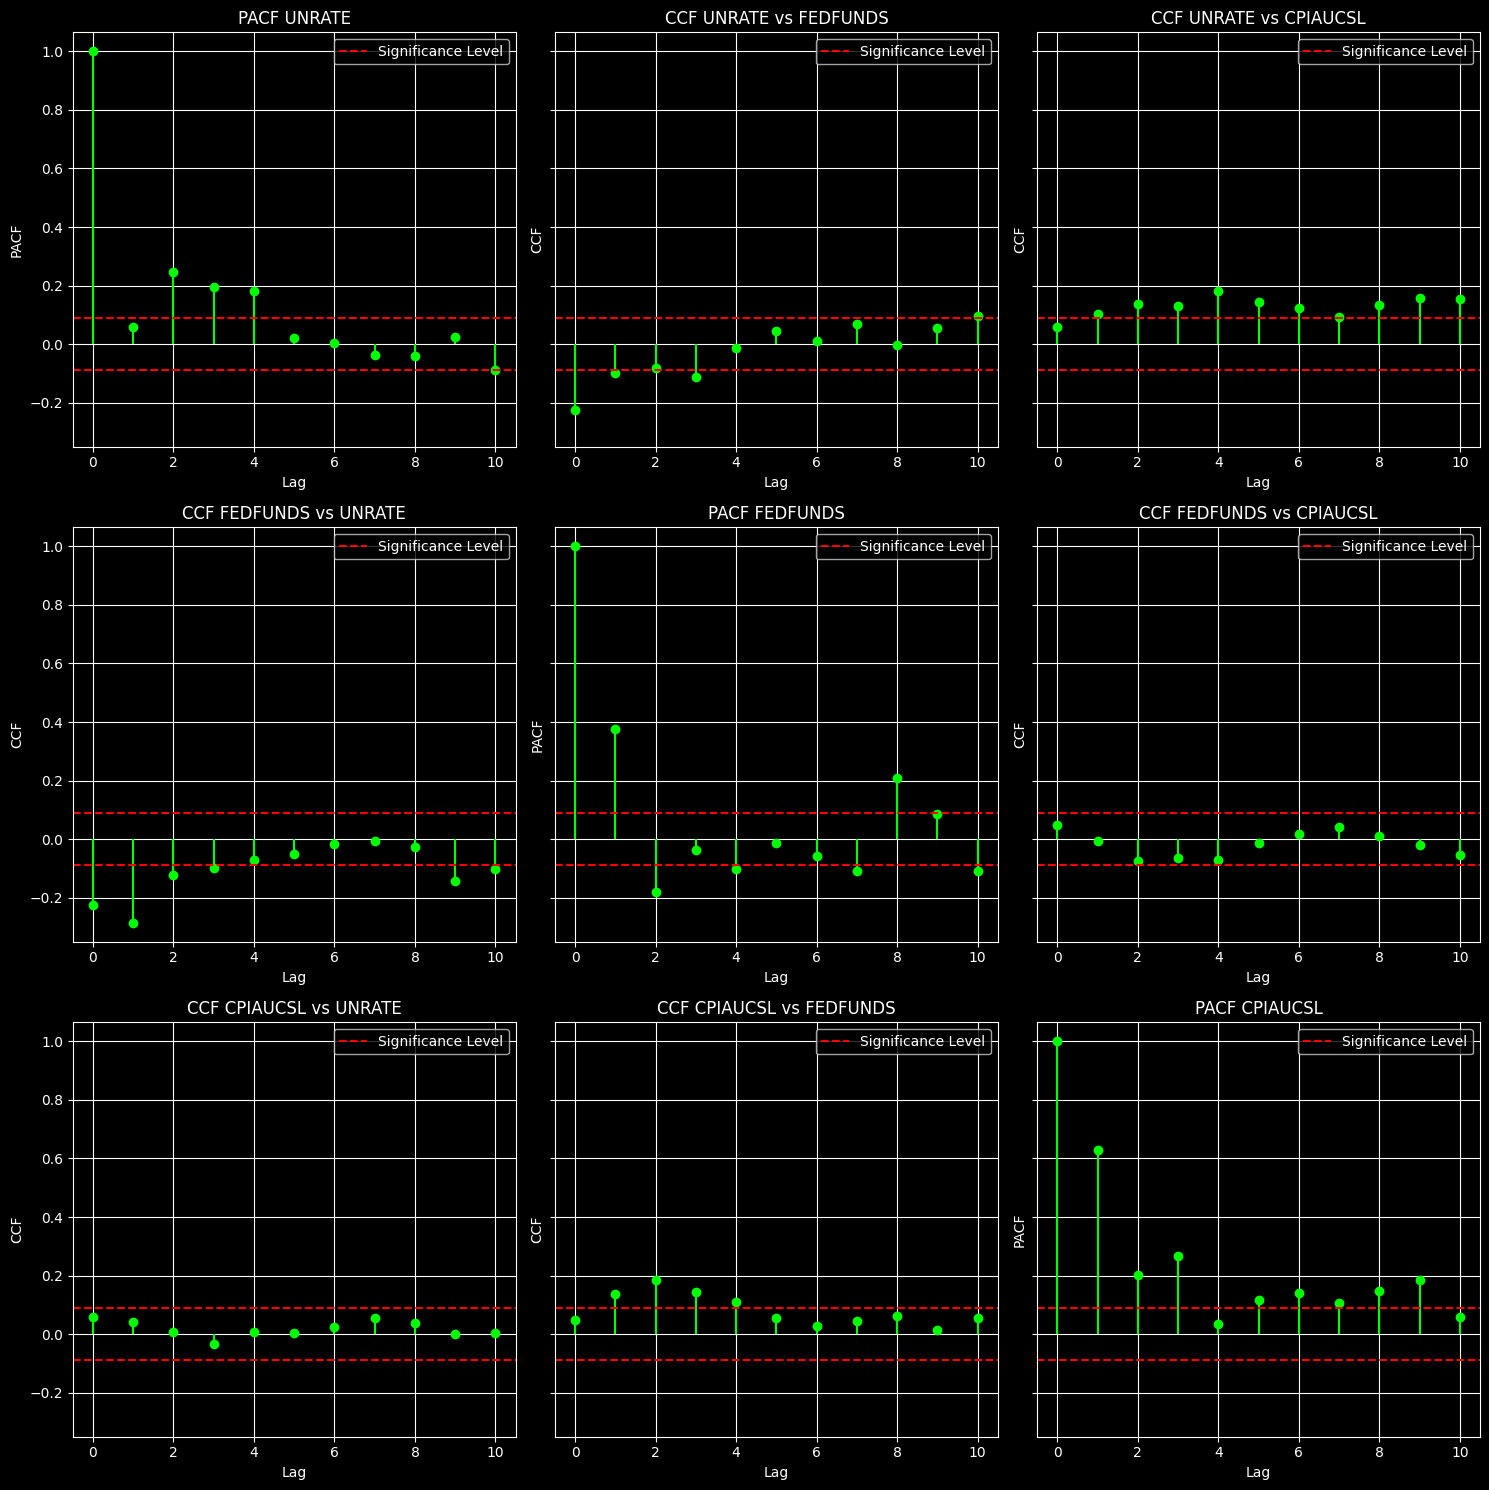

In [206]:
plot_pacf_ccf(diff_ymat00,10,1.96)

In [208]:
#Vector Autoregressive (VAR) Model with Differenced Series

model2 = VAR(diff_ymat00)

lag_order2 = model2.select_order(maxlags=12)

print(lag_order2.summary())
print('Best orders: ',lag_order2.selected_orders)

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -7.198      -7.171   0.0007484      -7.187
1       -7.884      -7.779   0.0003768      -7.843
2       -8.004      -7.821   0.0003342      -7.932
3       -8.108     -7.847*   0.0003011     -8.005*
4       -8.138      -7.798   0.0002922      -8.005
5       -8.139      -7.721   0.0002920      -7.975
6       -8.140      -7.644   0.0002917      -7.945
7       -8.161      -7.586   0.0002856      -7.935
8       -8.199      -7.546   0.0002749      -7.943
9       -8.244      -7.513   0.0002629      -7.957
10      -8.232      -7.422   0.0002662      -7.913
11      -8.242      -7.354   0.0002635      -7.893
12     -8.265*      -7.299  0.0002575*      -7.885
--------------------------------------------------
Best orders:  {'aic': 12, 'bic': 3, 'hqic': 3, 'fpe': 12}


In [209]:
# We will chose again the bayesian information criterion

var_model2 = model2.fit(2)

print(var_model2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 19, Aug, 2024
Time:                     00:01:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.82286
Nobs:                     489.000    HQIC:                  -7.93218
Log likelihood:          -103.874    FPE:                0.000334494
AIC:                     -8.00290    Det(Omega_mle):     0.000320531
--------------------------------------------------------------------
Results for equation UNRATE
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.032066         0.012989           -2.469           0.014
L1.UNRATE           0.041119         0.044488            0.924           0.355
L1.FEDFUNDS        -0.003781         0.014573           -0.259     

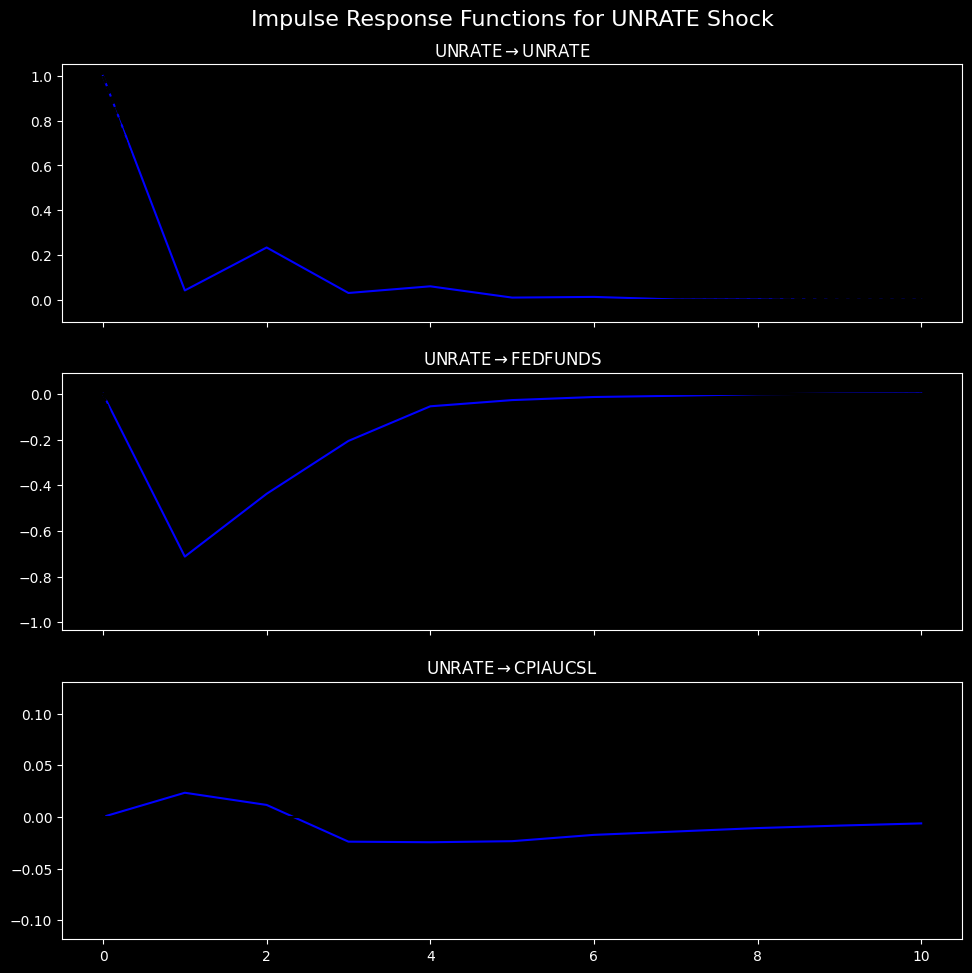

In [213]:
# Impulse Responde Function for a VAR(p) fitted of Differenced Series

irf = var_model2.irf(10)

fig = irf.plot(impulse='UNRATE')
fig.suptitle('Impulse Response Functions for UNRATE Shock', fontsize=16)

plt.show()

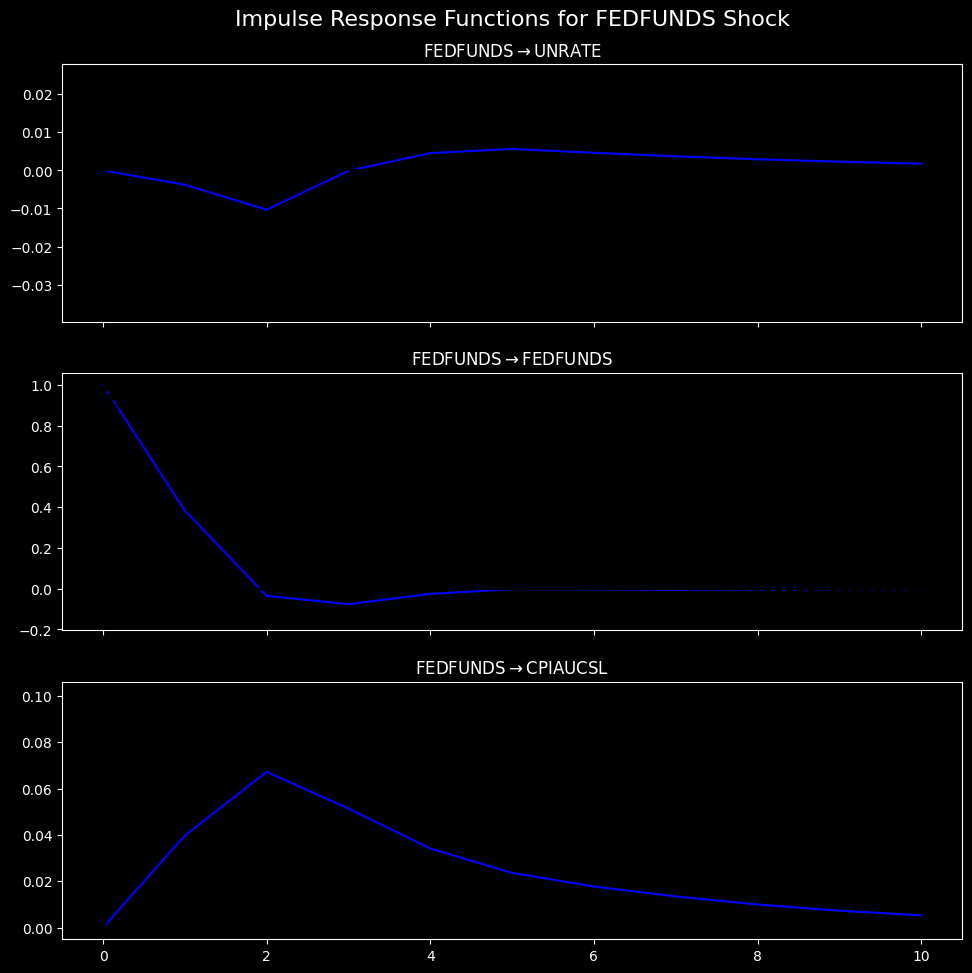

In [214]:
irf = var_model2.irf(10)

fig = irf.plot(impulse='FEDFUNDS')
fig.suptitle('Impulse Response Functions for FEDFUNDS Shock', fontsize=16)

plt.show()

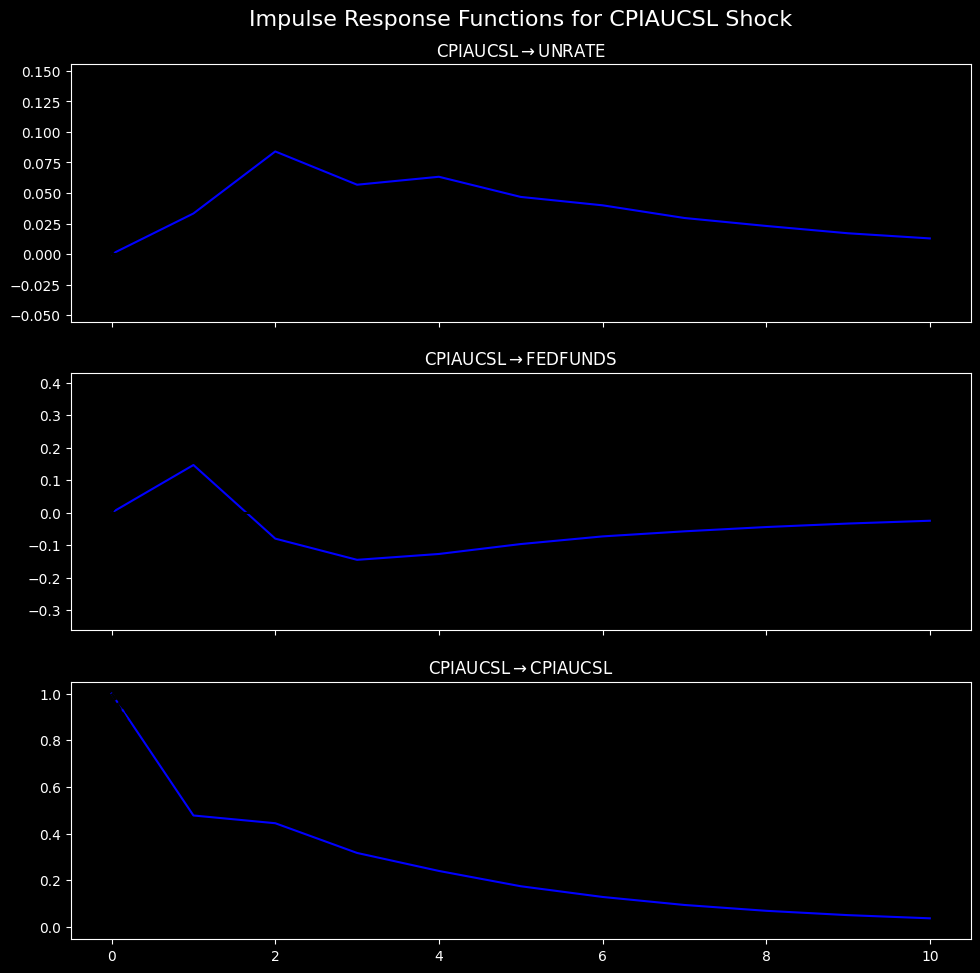

In [216]:
irf = var_model2.irf(10)

fig = irf.plot(impulse='CPIAUCSL')
fig.suptitle('Impulse Response Functions for CPIAUCSL Shock', fontsize=16)

plt.show()

- Interpreting the impulse response functions for the VAR model of the differenced series, we note:
   - When unemployment increases, the Fed Funds rate tends to decrease over subsequent quarters, consistent with Federal Reserve policies (i.e., stimulating economic growth and employment with lower interest rates).
   - When the Fed Funds rate increases, there is a modest increase in inflation(CPIA). This is consistent with the Fed raising rates to control inflation which tends to persist for several quarters (note the high 3-rd quarter lag partial autocorrelation in CPIAUCSL).
   - When in ation (CPIAUCSL) increases, unemployment tends to rise modestly, and the Fed Funds rate tends to increase.